<a href="https://colab.research.google.com/github/MrBravin/Zeta/blob/main/ml_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predição de secas usando dados de solo e clima.**

## **Introdução:**

A predição de secas é um problema crítico em muitas partes do mundo, pois as secas podem causar impactos devastadores na agricultura, no abastecimento de água e no meio ambiente. Portanto, é fundamental entendermos como antecipar a ocorrência de secas, permitindo a implementação de medidas preventivas e o planejamento adequado.

Os dados de solo e clima desempenham um papel fundamental na compreensão e predição de secas. As características do solo, como o teor de umidade, a textura e a composição química, afetam diretamente a capacidade do solo de reter água e suportar a vegetação. Além disso, as condições climáticas, como a precipitação, a temperatura e a umidade do ar, têm um impacto direto na quantidade de água disponível no solo.

Ao utilizar um dataset que combina dados de solo e clima, podemos desenvolver modelos de machine learning mais robustos e precisos. Esses modelos podem capturar correlações complexas entre as variáveis ambientais e, assim, melhorar nossa capacidade de prever secas com antecedência. Além disso, a escolha desse tipo de dataset permite uma abordagem multidisciplinar, integrando conhecimentos.


##**Analise Exploratória**

## **Trabalhando com os dados.**

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

In [26]:
def selecao_vif(df_atributos, limiar_vif):
    """Realiza a seleção de atributos por VIF.

    Args:
      df_atributos: DataFrame contendo os atributos.
      limiar_vf: valor do limiar do vif. Número positivo. Usualmente é 5 ou 10.

    Returns:
      DataFrame com os atributos selecionados.
    """

    df = df_atributos.copy()

    while True:
        VIFs = []

        for col in df.columns:
            X = df.drop(col, axis=1).values
            y = df[col].values

            r_quadrado = LinearRegression().fit(X, y).score(X, y)

            if r_quadrado != 1:
                VIF = 1 / (1 - r_quadrado)
            else:
                VIF = float("inf")

            VIFs.append(VIF)

        VIF_maximo = max(VIFs)

        if VIF_maximo > limiar_vif:
            indice = VIFs.index(VIF_maximo)
            coluna_remocao = df.columns[indice]
            df = df.drop(coluna_remocao, axis=1)
        else:
            break

    return df

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
df_validation = pd.read_csv('/content/drive/My Drive/Probability and Stats/ml_trabalho_final/Metereologia_dataset.zip (Unzipped Files)/validation_timeseries/validation_timeseries.csv')
#df_train = pd.read_csv('/content/drive/My Drive/Probability and Stats/ml_trabalho_final/Metereologia_dataset.zip (Unzipped Files)/train_timeseries/train_timeseries.csv')
# df_test = pd.read_csv('/content/drive/My Drive/Probability and Stats/ml_trabalho_final/Metereologia_dataset.zip (Unzipped Files)/test_timeseries/test_timeseries.csv')

In [29]:
df_validation = df_validation.dropna()
#Tranformação da coluna 'date' em três outras, categoricas: Day, month e year.
df_validation['year'] = pd.DatetimeIndex(df_validation['date']).year
df_validation['month'] = pd.DatetimeIndex(df_validation['date']).month
df_validation['day'] = pd.DatetimeIndex(df_validation['date']).day
df_validation['score'] = df_validation['score'].round().astype(int)

In [32]:
independent_variables = df_validation.drop('score', 1)
independent_variables = independent_variables.drop('fips', 1)
independent_variables = independent_variables.drop('date', 1)
independent_variables.head()
for a in independent_variables.columns:
    independent_variables = independent_variables[(independent_variables[a] <= independent_variables[a].mean() + 3*independent_variables[a].std()) &
                                                  (independent_variables[a] >= independent_variables[a].mean() - 3*independent_variables[a].std())]
independent_variables = selecao_vif(independent_variables, 5)
independent_variables

<ipython-input-32-4414c134e4f5>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  independent_variables = df_validation.drop('score', 1)
<ipython-input-32-4414c134e4f5>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  independent_variables = independent_variables.drop('fips', 1)
<ipython-input-32-4414c134e4f5>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  independent_variables = independent_variables.drop('date', 1)


,PRECTOT,PS,T2M_RANGE,TS,WS10M_MIN,WS10M_RANGE,WS50M_RANGE,year,month,day
2,18.82,99.69,9.20,14.06,1.64,2.09,4.72,2017,1,3
9,0.02,101.13,14.79,5.81,2.52,1.72,2.86,2017,1,10
16,0.14,100.60,9.88,17.10,1.71,1.90,3.15,2017,1,17
23,0.00,99.72,12.06,8.95,1.03,1.31,5.02,2017,1,24
30,0.00,100.37,15.24,11.32,1.76,1.24,4.52,2017,1,31
...,...,...,...,...,...,...,...,...,...,...
2268805,0.21,82.62,10.83,-1.94,2.93,2.51,4.80,2018,11,27
2268812,0.01,83.32,10.45,-8.96,2.20,3.03,2.67,2018,12,4
2268819,0.06,82.94,9.13,-4.08,2.07,3.01,5.01,2018,12,11
2268826,0.06,82.77,9.89,-1.31,2.04,2.65,4.05,2018,12,18


[None]

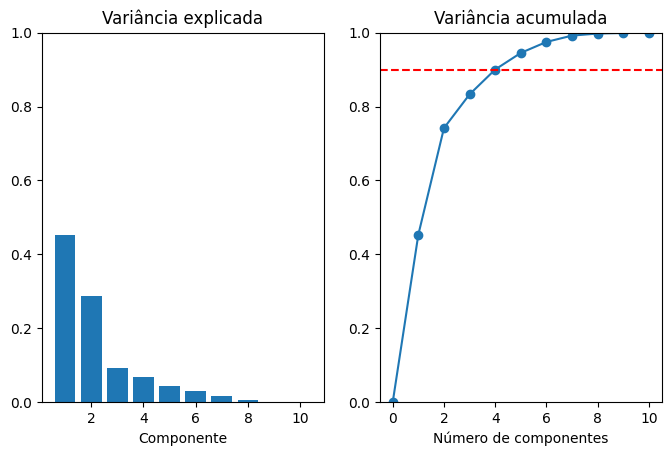

In [31]:
X = independent_variables
y = df_validation["score"]

pca = PCA()

pca.fit(X)

autovalores = pca.explained_variance_
autovetores = pca.components_.T

variancia_explicada = pca.explained_variance_ratio_


id_componentes = np.arange(1, pca.n_components_ + 1)

figura, eixos = plt.subplots(1, 2)

# Plot variância explicada
eixos[0].bar(id_componentes, variancia_explicada)
eixos[0].set(xlabel="Componente", title="Variância explicada", ylim=(0.0, 1.0))

# Plot variância acumulada
cv = np.cumsum(pca.explained_variance_ratio_)
eixos[1].plot(np.r_[0, id_componentes], np.r_[0, cv], marker="o")
eixos[1].set(
    xlabel="Número de componentes",
    title="Variância acumulada",
    ylim=(0.0, 1.0),
)
eixos[1].axhline(0.9, linestyle="--", color="red")

figura.set(figwidth=8)

In [33]:
n_components = 7

In [ ]:
df_tratado['fips'].nunique()    # Quantos valores unicos a coluna fips possui

3108

In [ ]:
df_tratado['score'] = df_tratado['score'].astype(int)
df_tratado['score'].round().value_counts()

<ipython-input-8-a4db8196873c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tratado['score'] = df_tratado['score'].astype(int)


0    242143
1     48312
2     21025
3      8732
4      2713
5       307
Name: score, dtype: int64

Em séries temporais, é mais comum aplicar técnicas específicas, como diferenciação, suavização ou transformações específicas de séries temporais.

In [ ]:
df_menor = df_tratado[:104]
df_menor


,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
2,1001,2017-01-03,18.82,99.69,9.74,14.24,13.44,13.44,18.48,9.29,...,14.06,2.25,3.73,1.64,2.09,4.80,7.27,2.54,4.72,2.0
9,1001,2017-01-10,0.02,101.13,5.62,5.92,4.54,4.55,12.42,-2.37,...,5.81,3.22,4.24,2.52,1.72,6.19,7.55,4.68,2.86,2.0
16,1001,2017-01-17,0.14,100.60,11.41,17.21,16.06,16.06,23.03,13.15,...,17.10,2.24,3.61,1.71,1.90,4.93,5.90,2.76,3.15,2.0
23,1001,2017-01-24,0.00,99.72,5.60,9.27,5.34,5.35,16.23,4.18,...,8.95,1.82,2.34,1.03,1.31,3.52,6.49,1.47,5.02,1.0
30,1001,2017-01-31,0.00,100.37,7.31,11.38,9.21,9.21,20.29,5.05,...,11.32,2.31,3.00,1.76,1.24,5.00,7.40,2.88,4.52,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1001,2018-11-27,0.00,100.40,2.95,1.08,-3.41,-3.32,6.91,-3.10,...,1.17,2.73,4.42,1.69,2.73,5.21,6.93,3.76,3.17,0.0
702,1001,2018-12-04,0.00,100.71,4.06,5.06,0.97,0.94,10.58,0.01,...,5.12,2.41,3.37,1.73,1.64,4.76,6.27,3.59,2.69,0.0
709,1001,2018-12-11,0.00,101.16,3.41,2.96,-1.35,-1.37,10.95,-2.61,...,2.11,1.65,2.51,1.04,1.47,2.86,4.29,1.45,2.85,0.0
716,1001,2018-12-18,0.00,100.49,5.30,8.44,4.70,4.63,16.37,1.18,...,7.71,1.48,2.06,0.18,1.88,2.90,5.03,0.16,4.87,0.0


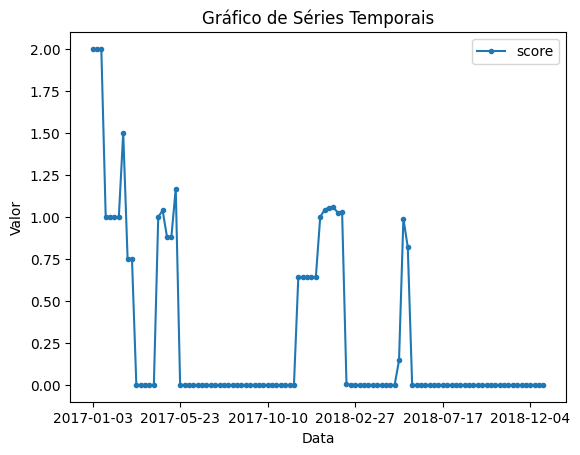

In [ ]:
df_menor.plot(x='date', y='score', marker='.', linestyle='-')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.title('Gráfico de Séries Temporais')
plt.show()

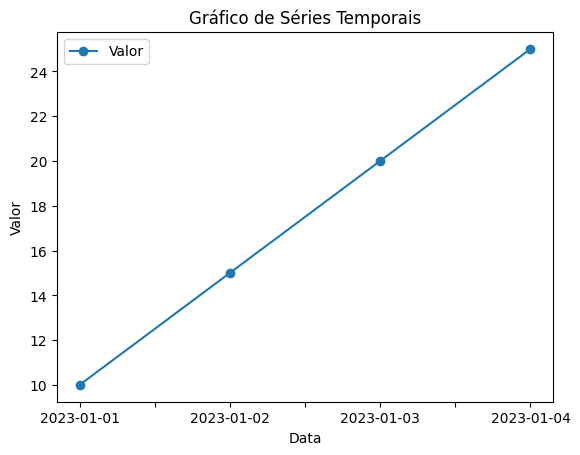

In [ ]:
data = {'Data': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04'],
        'Valor': [10, 15, 20, 25]}
df = pd.DataFrame(data)

# Plotar o gráfico
df.plot(x='Data', y='Valor', marker='o', linestyle='-')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.title('Gráfico de Séries Temporais')
plt.show()

In [ ]:
# Crie um exemplo de dataset
data = np.random.randint(0, 100, 100)

# Abra o dataset e selecione 5% dos dados iniciais
selected_data = data[:5]

# Imprima o dataset selecionado
print(selected_data)


[41 32 80 51 60]


In [ ]:
import pandas as pd

# Crie um exemplo de DataFrame
data = {'Coluna1': [1, 2, 3, 1, 2, 3],
        'Coluna2': [4, 4, 4, 5, 5, 5]}
df = pd.DataFrame(data)

# Retorne o número de valores únicos em cada coluna
print(df['Coluna1'].nunique())
print(df['Coluna2'].nunique())


3
2
